In [3]:
import nltk

In [4]:
#nltk.download()

In [5]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
file = open('../data/bts.txt', encoding='utf8')
a = file.read()

In [7]:
a

'BTS ruled the night at 2021 Mnet Asian Music Awards on Saturday even without attending, as the K-pop megastars nabbed a total of nine trophies, including four grand prizes.\n\nThe event, held at CJ ENM Content Studio in Paju, Gyeonggi Province, was conducted in person for the first time in two years since the COVID-19 outbreak.\n\nAfter making history at the American Music Awards last month as the first Asian act to grab the top honor, BTS extended their winning streak, taking home all four main prizes of 2021 MAMA. The septet was named artist of the year, worldwide icon of the year, won album of the year with “BE” and song of the year with “Butter.” This is the third straight year that BTS has swept all four top honors at MAMA since 2019.\n\nThe band also bagged best music video, best male group, best dance performance male, worldwide fans’ choice top10 and TikTok favorite moment.\n\nWith the members on vacation, the group delivered their acceptance speech through a taped video messa

In [61]:
for line in open('../data/stopwords.txt'):
    print(line.strip())

2021-12-14
It
so
far
A
The
in
of
on
until
at
for
it
a
25
be
are
but
not
such
it'
$469
was
cj
the
and
to
2021


In [62]:
#collections
# list(순서), dictionary(키:값),
# tuple(순서, 읽기전용), set(중복x)

## 불용어 사전 설정

In [63]:
stopwords = set(line.strip() for line in open('../data/stopwords.txt')) # 익명함수, 클러저!
stopwords  # set!구조

{'$469',
 '2021',
 '2021-12-14',
 '25',
 'A',
 'It',
 'The',
 'a',
 'and',
 'are',
 'at',
 'be',
 'but',
 'cj',
 'far',
 'for',
 'in',
 'it',
 "it'",
 'not',
 'of',
 'on',
 'so',
 'such',
 'the',
 'to',
 'until',
 'was'}

In [64]:
stopwords = stopwords.union(set(['mr','mrs','one']))
stopwords

{'$469',
 '2021',
 '2021-12-14',
 '25',
 'A',
 'It',
 'The',
 'a',
 'and',
 'are',
 'at',
 'be',
 'but',
 'cj',
 'far',
 'for',
 'in',
 'it',
 "it'",
 'mr',
 'mrs',
 'not',
 'of',
 'on',
 'one',
 'so',
 'such',
 'the',
 'to',
 'until',
 'was'}

## 단어 대체

In [65]:
wordcount = {}
for word in a.lower().split():
    word = word.replace('.', '')
    word = word.replace(',', '')
    word = word.replace(':', '')
    word = word.replace('\"', '')
    word = word.replace('*', '')
    word = word.replace('(', '')
    word = word.replace('"', '')
    
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [66]:
wordcount

{'bts': 4,
 'ruled': 1,
 'night': 1,
 'mnet': 13,
 'asian': 12,
 'music': 17,
 'awards': 17,
 'saturday': 12,
 'even': 1,
 'without': 1,
 'attending': 1,
 'as': 8,
 'k-pop': 2,
 'megastars': 1,
 'nabbed': 1,
 'total': 1,
 'nine': 1,
 'trophies': 2,
 'including': 4,
 'four': 3,
 'grand': 1,
 'prizes': 2,
 'event': 3,
 'held': 2,
 'enm': 12,
 'content': 11,
 'studio': 11,
 'paju': 11,
 'gyeonggi': 11,
 'province': 11,
 'conducted': 1,
 'person': 1,
 'first': 4,
 'time': 3,
 'two': 3,
 'years': 3,
 'since': 3,
 'covid-19': 2,
 'outbreak': 1,
 'after': 2,
 'making': 2,
 'history': 1,
 'american': 1,
 'last': 1,
 'month': 1,
 'act': 1,
 'grab': 1,
 'top': 3,
 'honor': 1,
 'extended': 1,
 'their': 3,
 'winning': 1,
 'streak': 1,
 'taking': 1,
 'home': 1,
 'all': 2,
 'main': 1,
 'mama': 6,
 'septet': 1,
 'named': 2,
 'artist': 4,
 'year': 11,
 'worldwide': 4,
 'icon': 2,
 'won': 3,
 'album': 1,
 'with': 6,
 '“be”': 1,
 'song': 3,
 '“butter”': 1,
 'this': 4,
 'is': 2,
 'third': 1,
 'straight':

## 단어 빈도수 카운트 객체

In [67]:
import collections

In [68]:
word_counter = collections.Counter(wordcount)

In [69]:
word_counter.most_common(3)

[('music', 17), ('awards', 17), ('mnet', 13)]

In [70]:
n_print = int(input('how many list>> '))
word_counter.most_common(n_print)

how many list>> 5


[('music', 17), ('awards', 17), ('mnet', 13), ('asian', 12), ('saturday', 12)]

In [71]:
n_print = int(input('how many list>> '))
for word, count in word_counter.most_common(n_print):
    print(word, ':', count)

how many list>> 5
music : 17
awards : 17
mnet : 13
asian : 12
saturday : 12


In [72]:
file.close()

In [74]:
list = word_counter.most_common(n_print)
df = pd.DataFrame(list, columns=['Word', 'Count'])
df

,Word,Count
0,music,17
1,awards,17
2,mnet,13
3,asian,12
4,saturday,12


<AxesSubplot:xlabel='Word'>

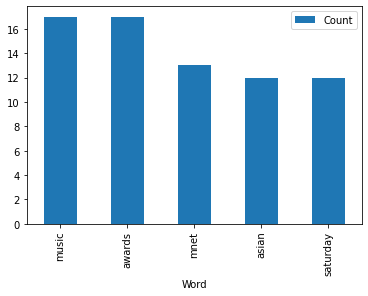

In [75]:
df.plot.bar(x='Word', y='Count')

## 연습

In [76]:
import os

In [98]:
path_neg = 'C:/Users/ts.sbyoo/AppData/Roaming/nltk_data/corpora/movie_reviews/neg/cv000_29416.txt'
path_pos = 'C:/Users/ts.sbyoo/AppData/Roaming/nltk_data/corpora/movie_reviews/pos/cv000_29590.txt'

In [82]:
file_list_neg = os.listdir(path_neg)
file_list_py_neg = [file for file in file_list_neg if file.endswith('.txt')]

In [88]:
file_list_neg

['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt',
 'cv005_29357.txt',
 'cv006_17022.txt',
 'cv007_4992.txt',
 'cv008_29326.txt',
 'cv009_29417.txt',
 'cv010_29063.txt',
 'cv011_13044.txt',
 'cv012_29411.txt',
 'cv013_10494.txt',
 'cv014_15600.txt',
 'cv015_29356.txt',
 'cv016_4348.txt',
 'cv017_23487.txt',
 'cv018_21672.txt',
 'cv019_16117.txt',
 'cv020_9234.txt',
 'cv021_17313.txt',
 'cv022_14227.txt',
 'cv023_13847.txt',
 'cv024_7033.txt',
 'cv025_29825.txt',
 'cv026_29229.txt',
 'cv027_26270.txt',
 'cv028_26964.txt',
 'cv029_19943.txt',
 'cv030_22893.txt',
 'cv031_19540.txt',
 'cv032_23718.txt',
 'cv033_25680.txt',
 'cv034_29446.txt',
 'cv035_3343.txt',
 'cv036_18385.txt',
 'cv037_19798.txt',
 'cv038_9781.txt',
 'cv039_5963.txt',
 'cv040_8829.txt',
 'cv041_22364.txt',
 'cv042_11927.txt',
 'cv043_16808.txt',
 'cv044_18429.txt',
 'cv045_25077.txt',
 'cv046_10613.txt',
 'cv047_18725.txt',
 'cv048_18380.txt',
 'cv049_21917.txt',
 'cv050_

In [100]:
file_neg = open(path_neg, encoding='utf8')
neg = file_neg.read()
file_pos = open(path_pos, encoding='utf8')
pos = file_pos.read()

In [151]:
stopwords = set(line.strip() for line in open('../data/stopwords.txt')) # 익명함수, 클러저!

In [176]:
wordcount_pos = {}
for word_pos in pos.lower().split():
    word_pos = word_pos.replace('.', '')
    word_pos = word_pos.replace(',', '')
    word_pos = word_pos.replace(':', '')
    word_pos = word_pos.replace('\"', '')
    word_pos = word_pos.replace('*', '')
    word_pos = word_pos.replace('(', '')
    word_pos = word_pos.replace('"', '')
    word_pos = word_pos.replace(' ', '')
    word_pos = word_pos.replace('  ', '')
    
    if word_pos not in stopwords:
        if word_pos not in wordcount_pos:
            wordcount_pos[word_pos] = 1
        else:
            wordcount_pos[word_pos] += 1

In [177]:
wordcount_neg = {}
for word_neg in neg.lower().split():
    word_neg = word_neg.replace('.', '')
    word_neg = word_neg.replace(',', '')
    word_neg = word_neg.replace(':', '')
    word_neg = word_neg.replace('\"', '')
    word_neg = word_neg.replace('*', '')
    word_neg = word_neg.replace('(', '')
    word_neg = word_neg.replace('"', '')
    word_neg = word_neg.replace(' ', '')
    word_neg = word_neg.replace('  ', '')
    
    if word_neg not in stopwords:
        if word_neg not in wordcount_neg:
            wordcount_neg[word_neg] = 1
        else:
            wordcount_neg[word_neg] += 1

In [154]:
word_counter_pos = collections.Counter(wordcount_pos)
word_counter_neg = collections.Counter(wordcount_neg)

In [155]:
n_print = int(input('how many list>> '))
for word, count in word_counter_pos.most_common(n_print):
    print(word, ':', count)

how many list>> 10
 : 496
but : 24
like : 21
film : 18
all : 17
have : 15
shark : 15
about : 14
even : 14
i : 13


In [156]:
n_print = int(input('how many list>> '))
for word, count in word_counter_neg.most_common(n_print):
    print(word, ':', count)

how many list>> 10
 : 376
but : 17
film : 16
movie : 15
not : 15
even : 14
one : 13
all : 12
like : 12
there : 11


In [148]:
file.close()

In [163]:
list_pos = word_counter_pos.most_common(n_print)
df_pos = pd.DataFrame(list_pos, columns=['Pos_Word', 'Count'])
df_pos.drop(0, inplace=True)
df_pos

,Pos_Word,Count
1,but,24
2,like,21
3,film,18
4,all,17
5,have,15
6,shark,15
7,about,14
8,even,14
9,i,13


In [164]:
list_neg = word_counter_neg.most_common(n_print)
df_neg = pd.DataFrame(list_neg, columns=['Neg_Word', 'Count'])
df_neg.drop(0, inplace=True)
df_neg

,Neg_Word,Count
1,but,17
2,film,16
3,movie,15
4,not,15
5,even,14
6,one,13
7,all,12
8,like,12
9,there,11


<AxesSubplot:xlabel='Pos_Word'>

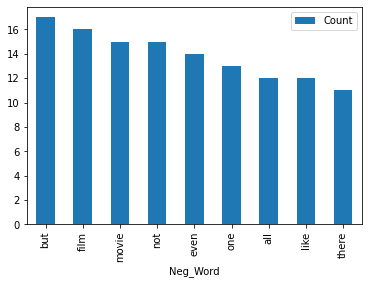

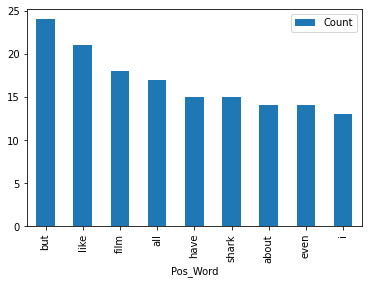

In [165]:
df_neg.plot.bar(x='Neg_Word', y ='Count')
df_pos.plot.bar(x='Pos_Word', y ='Count')

In [209]:
from nltk import Text
from nltk.tag import pos_tag
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [170]:
retokenize = RegexpTokenizer('[\w]+')

In [190]:
text_pos = Text(retokenize.tokenize(pos))
text_neg = Text(retokenize.tokenize(neg))

In [218]:
stopwords = ['the','a','of','in','to','it','s','with','an','this','i']

In [219]:
pos_tokens = pos_tag(word_tokenize(pos))
pos_tokens

[('films', 'NNS'),
 ('adapted', 'VBD'),
 ('from', 'IN'),
 ('comic', 'JJ'),
 ('books', 'NNS'),
 ('have', 'VBP'),
 ('had', 'VBD'),
 ('plenty', 'NN'),
 ('of', 'IN'),
 ('success', 'NN'),
 (',', ','),
 ('whether', 'IN'),
 ('they', 'PRP'),
 ("'re", 'VBP'),
 ('about', 'IN'),
 ('superheroes', 'NNS'),
 ('(', '('),
 ('batman', 'NN'),
 (',', ','),
 ('superman', 'NN'),
 (',', ','),
 ('spawn', 'NN'),
 (')', ')'),
 (',', ','),
 ('or', 'CC'),
 ('geared', 'VBN'),
 ('toward', 'IN'),
 ('kids', 'NNS'),
 ('(', '('),
 ('casper', 'NN'),
 (')', ')'),
 ('or', 'CC'),
 ('the', 'DT'),
 ('arthouse', 'NN'),
 ('crowd', 'NN'),
 ('(', '('),
 ('ghost', 'JJ'),
 ('world', 'NN'),
 (')', ')'),
 (',', ','),
 ('but', 'CC'),
 ('there', 'EX'),
 ("'s", 'VBZ'),
 ('never', 'RB'),
 ('really', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('comic', 'JJ'),
 ('book', 'NN'),
 ('like', 'IN'),
 ('from', 'IN'),
 ('hell', 'NN'),
 ('before', 'IN'),
 ('.', '.'),
 ('for', 'IN'),
 ('starters', 'NNS'),
 (',', ','),
 ('it', 'PRP'),
 ('was', 'VBD'),


In [228]:
neg_tokens = pos_tag(word_tokenize(neg))
neg_tokens

[('plot', 'NN'),
 (':', ':'),
 ('two', 'CD'),
 ('teen', 'NN'),
 ('couples', 'NNS'),
 ('go', 'VBP'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('church', 'NN'),
 ('party', 'NN'),
 (',', ','),
 ('drink', 'NN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('drive', 'NN'),
 ('.', '.'),
 ('they', 'PRP'),
 ('get', 'VBP'),
 ('into', 'IN'),
 ('an', 'DT'),
 ('accident', 'NN'),
 ('.', '.'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('guys', 'NN'),
 ('dies', 'VBZ'),
 (',', ','),
 ('but', 'CC'),
 ('his', 'PRP$'),
 ('girlfriend', 'NN'),
 ('continues', 'VBZ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('him', 'PRP'),
 ('in', 'IN'),
 ('her', 'PRP$'),
 ('life', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('nightmares', 'NNS'),
 ('.', '.'),
 ('what', 'WP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('deal', 'NN'),
 ('?', '.'),
 ('watch', 'VB'),
 ('the', 'DT'),
 ('movie', 'NN'),
 ('and', 'CC'),
 ('``', '``'),
 ('sorta', 'JJ'),
 ('``', '``'),
 ('find', 'VB'),
 ('out', 'RP'),
 ('.', '.'),
 ('.', '.'),
 ('.', '.'),
 ('critique', '

### stopwords를 만들어서 뺀 다음 PdreqDist객체 생성

In [229]:
names_list_pos = [t[0] for t in pos_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names_pos = FreqDist(names_list_pos)

In [230]:
names_list_neg = [t[0] for t in neg_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names_neg = FreqDist(names_list_neg)

In [221]:
fd_names_pos.N()

750

In [231]:
fd_names_neg.N()

524

### most_common(5)를 이용해서 빈도수 5위까지 프린트

In [224]:
fd_names_pos.most_common(5)

[('film', 19), ('shark', 16), ('movie', 12), ('jackie', 10), ('money', 7)]

In [232]:
fd_names_neg.most_common(5)

[('film', 17), ('movie', 15), ('audience', 7), ('daryl', 7), ('way', 6)]

In [223]:
fd_names_pos.freq("film")

0.025333333333333333

In [234]:
fd_names_neg.freq("film")

0.03244274809160305

### movie_revies pos/neg  비교그래프!

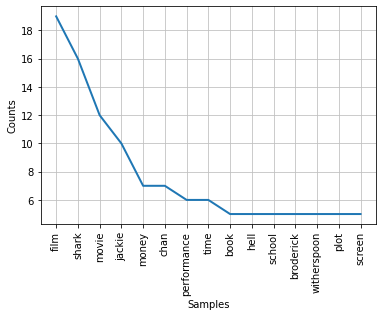

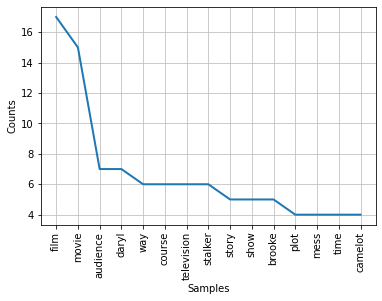

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [236]:
fd_names_pos.plot(15)
fd_names_neg.plot(15)

### wordcloud

In [239]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

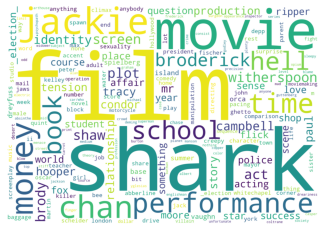

In [245]:
wc = WordCloud(width=2000, height=1400, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names_pos))
plt.axis("off")
plt.show()

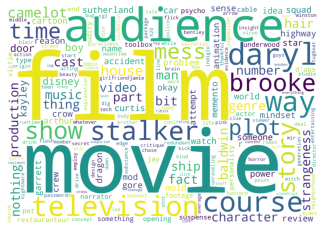

In [246]:
wc = WordCloud(width=2000, height=1400, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names_neg))
plt.axis("off")
plt.show()

### 빈도수에 대한 그래프

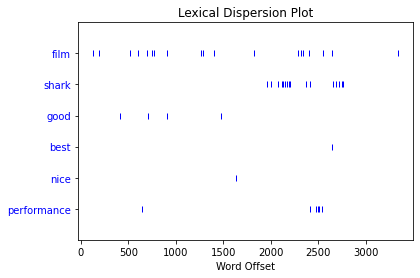

In [248]:
text_pos.dispersion_plot(['film','shark','good','best','nice','performance'])

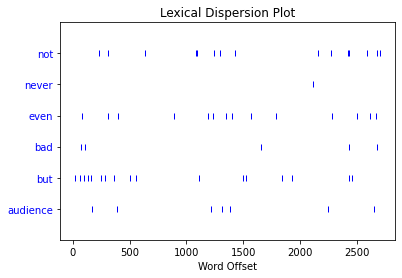

In [249]:
text_neg.dispersion_plot(['not','never','even','bad','but','audience'])

In [187]:
text_neg.similar('not')

and that certainly
